# Rigidity and Flexibility of Graphs in SageMath

Jan Legerský

2nd Software and Industrial Workshop in Cambridge

[jan.legersky.cz](https://jan.legersky.cz)

![S1](./animations/S_1.svg)

## Tools

- [SageMath](http://www.sagemath.org/)
- [Binder](https://mybinder.org/)
- [Documentation](https://jan.legersky.cz/public_files/documentation_rigidflexiblegraphs/) generated from docstrings  using [Sphinx](http://sphinx-doc.org/) (tests)
- Animated SVG
- [POV-Ray](http://www.povray.org/)

## Basic notions

**Definition**

Let $G=(V_G,E_G)$ be a graph with an edge labeling $\lambda:E_G\rightarrow \mathbb{R}_+$.

A realization $\rho:V_G\rightarrow\mathbb{R}^2$ is called *compatible* with $\lambda$ if
$||\rho(u)-\rho(v)||=\lambda(uv)$ for all $uv\in E_G$.

The labeling $\lambda$ is called

- *(proper) flexible* if the number of (injective) realizations of $G$ compatible with $\lambda$ is infinite,
- *rigid* if the number of realizations of $G$ compatible with $\lambda$ is finite and positive,

where the counting is up to direct Euclidean isometries.
A graph is called *movable* iff it has a proper flexible labeling.

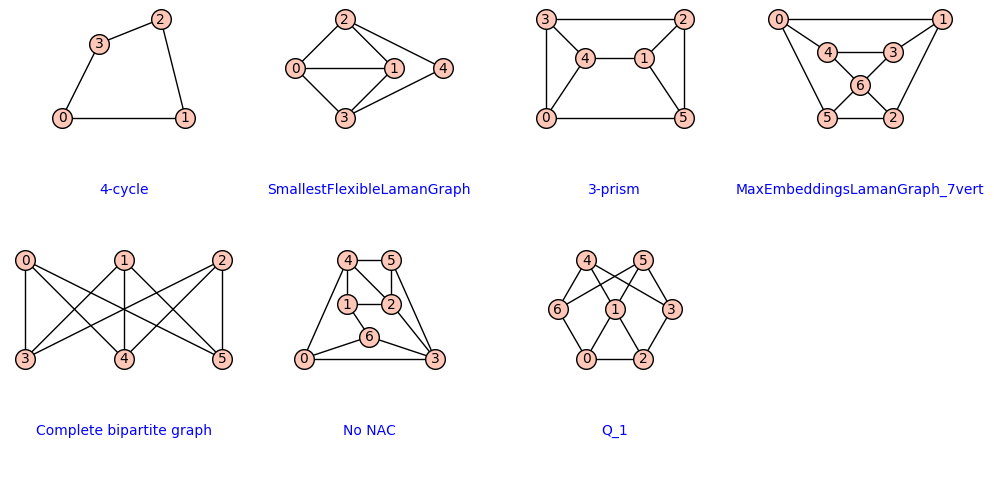

In [1]:
from rigid_and_flexible_graphs.graph_generator import GraphGenerator
from rigid_and_flexible_graphs.rigid_flexible_graph import RigidFlexibleGraph
C4 = RigidFlexibleGraph([[0,1],[1,2],[2,3],[0,3]], name='4-cycle', pos={0:(0,0),1:(1,0), 2:(0.8,0.8), 3:(0.3,0.6)})
S = GraphGenerator.SmallestFlexibleLamanGraph()
T = GraphGenerator.ThreePrismGraph()
M = GraphGenerator.MaxEmbeddingsLamanGraph(7)
K33 = RigidFlexibleGraph(graphs.CompleteBipartiteGraph(3,3))
N = RigidFlexibleGraph(448412, pos={0 : (-0.5,-0.75), 1 : (0.5,0.5), 2 : (1.5,0.5), 3 : (2.5,-0.75),
                                       4 : (0.5,1.5), 5 : (1.5,1.5), 6 : (1,-0.25)}, name='No NAC')
Q1 = GraphGenerator.Q1Graph()
examples = [C4, S, T, M, K33, N, Q1]
# show(*[G.plot().show(figsize=[4,4], dpi=80) for G in examples])
figs = graphics_array([[G.plot() for G in examples[:4]],
                       [text(G.name(),(0,0)) for G in examples[:4]],
                       [G.plot() for G in examples[4:]]+[plot(Graph([]))],
                       [text(G.name(),(0,0)) for G in examples[4:]],
                      ], ncols=4, nrows=4)
figs.show(figsize=[10,5], axes=False)

**Theorem** [Pollaczek-Geiringer, Laman]

A graph is *generically rigid*, i.e., a generic realization defines a rigid labeling,
if and only if the graph contains a *Laman* subgraph with the same set of vertices.

A graph $G=(V_G,E_G)$ is called *Laman* if $|E_G| = 2|V_G|-3$, and $|E_H|\leq 2|V_H|-3$ for all subgraphs $H$ of $G$.

**Our main interest - non-generic (proper) flexible labelings of generically rigid graphs**

In [2]:
table([['', 'is Laman']]+[[G.name(), G.is_Laman()] for G in examples])

,is Laman
4-cycle,
SmallestFlexibleLamanGraph,
3-prism,
MaxEmbeddingsLamanGraph_7vert,
Complete bipartite graph,
No NAC,
Q_1,


## Rigid graphs - number of realizations

Given a Laman graph $G$ and a rigid labeling $\lambda$, how many compatible realizations are there?

We fix an edge $\bar{u}\bar{v}$ to get a system of equations:

$x_{\bar{u}}=0, y_{\bar{u}}=0, x_{\bar{v}}=\lambda_{\bar{u}\bar{v}}, y_{\bar{v}}=0$,

$(x_u-x_v)^2+(y_u-y_v)^2= \lambda_{uv}^2$ for all $uv \in E_G\setminus\{\bar{u}\bar{v}\}$.

- well-constrained
- the number of complex solutions is the same for generic choices of $\lambda$
- solving using PHC

In [3]:
L = {
    (0, 3): 2,
    (0, 4): 3,
    (0, 5): 5,
    (1, 2): 3,
    (1, 4): 5,
    (1, 5): 4,
    (2, 3): 5,
    (2, 5): 2,
    (3, 4): 4
}
for eq in T.system_of_equations(L, [4,3])[0]:
    show(eq)

s5 - 5.25000000000000*x5 - 2.90473750965556*y5 - 16.0000000000000

-2*x1*x2 - 2*y1*y2 + s2 + 16.0000000000000

-2*x1*x5 - 2*y1*y5 + s5 + 9.00000000000000

s2 - 8.00000000000000*x2 - 9.00000000000000

-2*x2*x5 - 2*y2*y5 + s2 + s5 - 4.00000000000000

-x1^2 - y1^2 + 25.0000000000000

-x2^2 - y2^2 + s2

-x5^2 - y5^2 + s5

PHCv2.4.46 released 2017-09-28 works!
# real:  10
# complex: 2
{0: (2.62500000000000, 1.45236875482778), 1: (6.69301815045697 - 1.39680810523952*I, 2.00018903641813 + 4.67398922344617*I), 2: (-1.99354617629808 - 0.780433658070314*I, 1.34365493147118 - 3.48122502111472*I), 3: (4, 0), 4: (0, 0), 5: (-3.01751595497781 + 4.58646357544753*I, -4.37292058156694 - 4.44255940038919*I)}


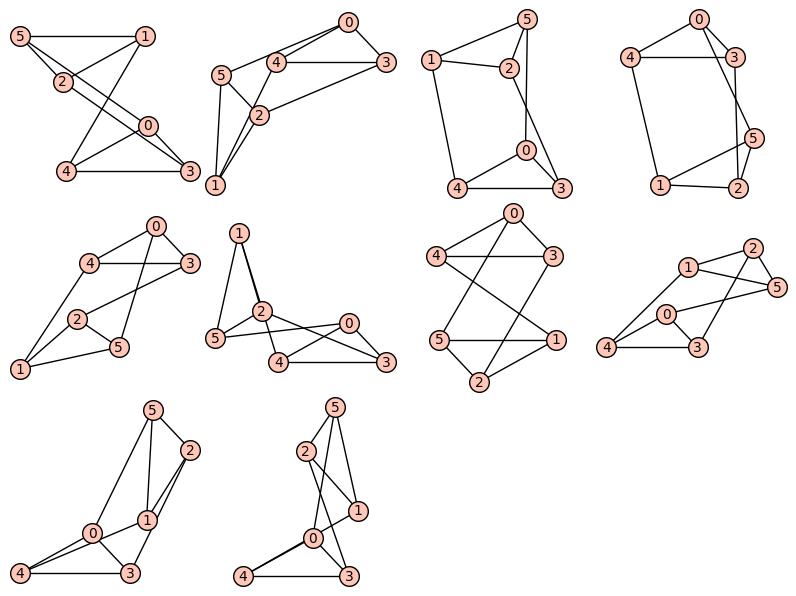

In [4]:
res_RR, res_CC = T.realizations(L,[4,3])
print '# real: ', len(res_RR)
print '# complex:', len(res_CC)
print res_CC[0]
show(*[T.plot(pos=rho) for rho in res_RR])

## Flexible labelings

**Definition**

Let $G$ be a graph. A coloring of edges $\delta\colon  E_G\rightarrow \{\text{blue, red}\}$ 
is called a *NAC-coloring*, if it is surjective and for every cycle $C$ in $G$,
either all edges of $C$ have the same color, or
$C$ contains at least 2 edges in each color.

**Theorem** [Grasegger, L., Schicho]

A graph $G$ has a flexible labeling if and only if it has a NAC-coloring.

In [5]:
table([['', 'has NAC-coloring']]+[[G.name(), G.has_NAC_coloring()] for G in examples])

,has NAC-coloring
4-cycle,
SmallestFlexibleLamanGraph,
3-prism,
MaxEmbeddingsLamanGraph_7vert,
Complete bipartite graph,
No NAC,
Q_1,


4-cycle


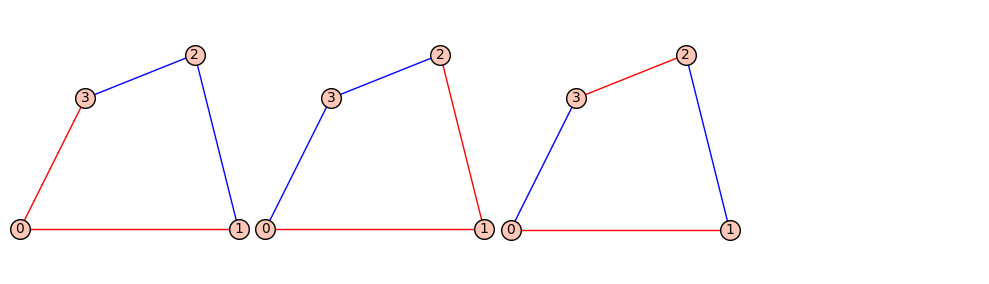

SmallestFlexibleLamanGraph


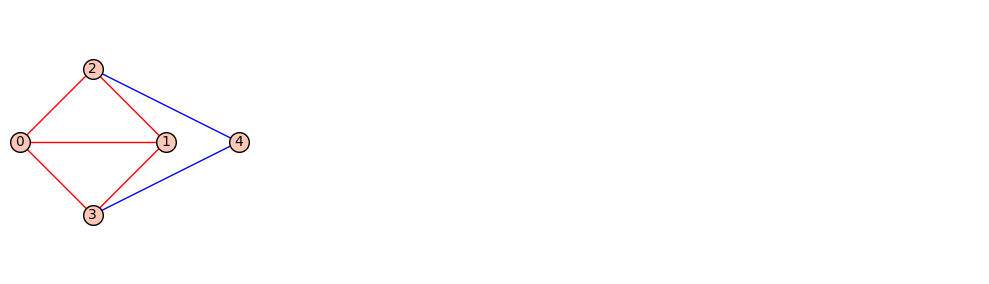

3-prism


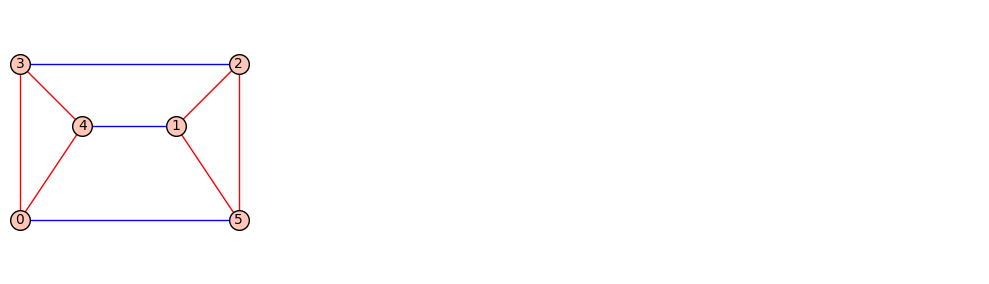

In [6]:
for G in [C4, S, T]:
    print G.name()
    graphics_array([col.plot() for col in G.NAC_colorings()], ncols=4).show(
        figsize=[10,3])

## Construction of a motion from a NAC-coloring

In [7]:
from rigid_and_flexible_graphs.graph_motion import GraphMotion
delta = T.NAC_colorings()[0]
motion_T = GraphMotion.GridConstruction(T, delta); motion_T.parametrization()

{0: (0, 0),
 1: (sin(alpha) + 1, cos(alpha)),
 2: (2*sin(alpha) + 1, 2*cos(alpha)),
 3: (2*sin(alpha), 2*cos(alpha)),
 4: (sin(alpha), cos(alpha)),
 5: (1, 0)}

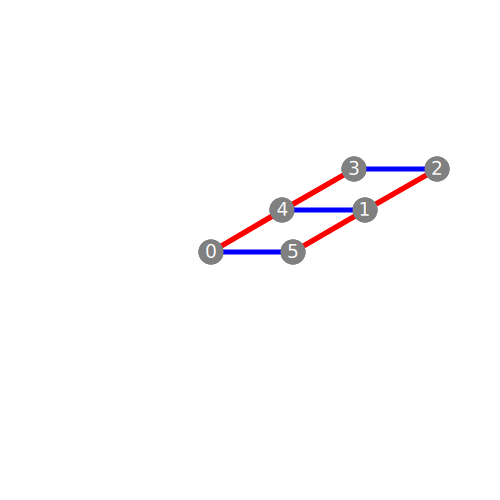

In [8]:
motion_T.animation_SVG(edge_partition=[delta.red_edges(), delta.blue_edges()], colors=['red', 'blue'])

In [9]:
motion_T = GraphMotion.GridConstruction(T, delta, zigzag=[[[0,0], [3/4,1/2], [2,0]], [[0,0], [1,0]]]); motion_T.parametrization()

{0: (0, 0),
 1: (3/4*cos(alpha) + 1/2*sin(alpha) + 1, 1/2*cos(alpha) - 3/4*sin(alpha)),
 2: (2*cos(alpha) + 1, -2*sin(alpha)),
 3: (2*cos(alpha), -2*sin(alpha)),
 4: (3/4*cos(alpha) + 1/2*sin(alpha), 1/2*cos(alpha) - 3/4*sin(alpha)),
 5: (1, 0)}

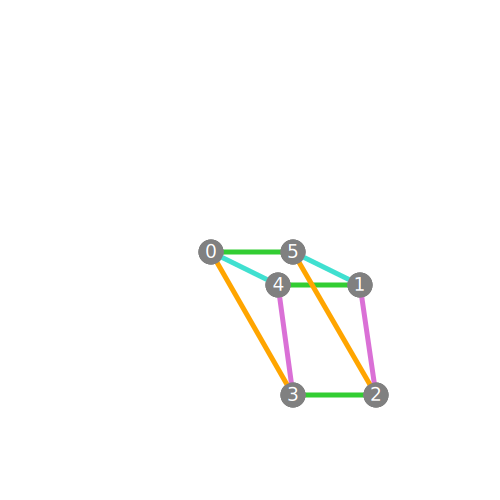

In [10]:
motion_T.animation_SVG()

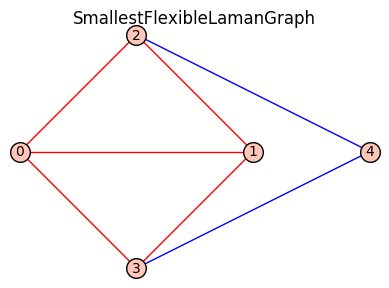

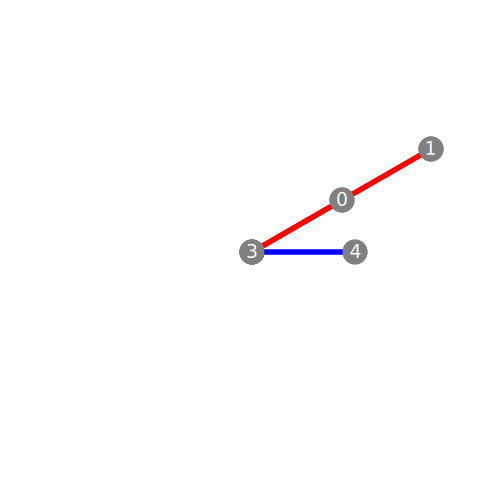

In [11]:
delta = S.NAC_colorings()[0]
delta.plot().show(figsize=[4,4])
motion_S = GraphMotion.GridConstruction(S, delta, check=False)
motion_S.animation_SVG(edge_partition=[delta.red_edges(), delta.blue_edges()], colors=['red', 'blue'])

In [12]:
table([['', 'NAC-coloring', 'injective grid']]+[[G.name(), G.has_NAC_coloring(), G.has_injective_grid_construction()] for G in examples])

,NAC-coloring,injective grid
4-cycle,,
SmallestFlexibleLamanGraph,,
3-prism,,
MaxEmbeddingsLamanGraph_7vert,,
Complete bipartite graph,,
No NAC,,
Q_1,,


## Movable graphs

Recall - we look for a **proper** flexible labeling, i.e., infinitely many **injective** realizations

**Definition**
$\DeclareMathOperator{\CDC}{CDC} \newcommand{\cdc}[1]{\CDC(#1)}$
$\DeclareMathOperator{\Upairs}{U} \newcommand{\upairs}[1]{\Upairs(#1)}$

Let $\upairs{G}$ denote the set of all pairs $\{u,v\}\subset V_G$ such that $uv\notin E_G$ and 
there exists a path from $u$ to $v$ which is unicolor for all NAC-colorings $\delta$ of $G$.	
If there exists a sequence of graphs $G=G_0, \dots, G_n$ such that
$G_i=(V_{G_{i-1}},E_{G_{i-1}} \cup \upairs{G_{i-1}})$ for $i\in\{1,\dots,n\}$
and $\upairs{G_n}=\emptyset$,
then the graph $G_n$ is called *the constant distance closure* of $G$, denoted by $\cdc{G}$.

**Theorem** [Grasegger, L., Schicho]

A graph $G$ is movable if and only $\cdc{G}$ is movable.

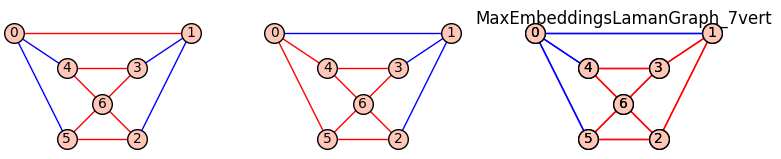

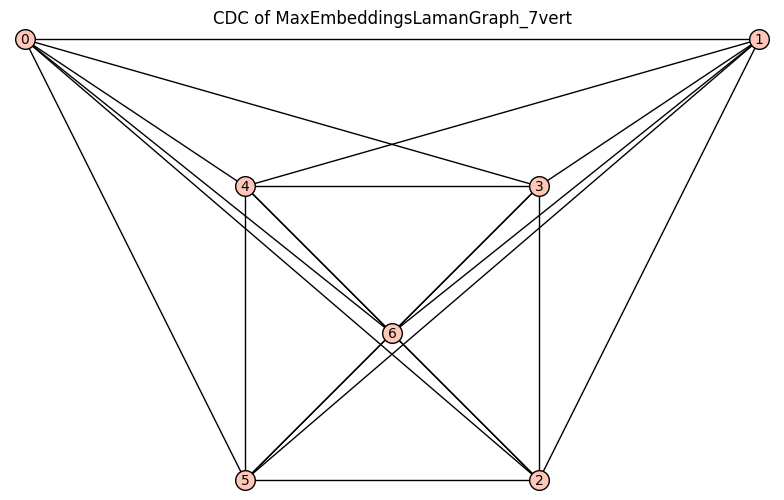

In [13]:
CDC = M.constant_distance_closure()
show(graphics_array([col.plot() for col in M.NAC_colorings()]))
CDC.plot()

**Corollary**

If $G$ is movable, then $\cdc{G}$ is not complete.

In [14]:
table([['', 'NAC-coloring', 'injective grid', 'CDC non-complete']]+
      [[G.name(), G.has_NAC_coloring(), G.has_injective_grid_construction(), not G.cdc_is_complete()] for G in examples])

,NAC-coloring,injective grid,CDC non-complete
4-cycle,,,
SmallestFlexibleLamanGraph,,,
3-prism,,,
MaxEmbeddingsLamanGraph_7vert,,,
Complete bipartite graph,,,
No NAC,,,
Q_1,,,


**Lemma** [Grasegger, L., Schicho]

Let $G=(V,E)$ be a graph with an injective embedding $\omega:V\rightarrow\mathbb{R}^3$ such that for every edge 
$uv\in E$, the vector $\omega(u)-\omega(v)$ is parallel to one of the four vectors $(1,0,0)$, $(0,1,0)$, $(0,0,1)$, $(-1,-1,-1)$, and all four directions are present.
Then $G$ is movable.

Moreover, there exist two NAC-colorings such that two edges are parallel in the embedding $\omega$ if and only if they
receive the same pair of colors.

True


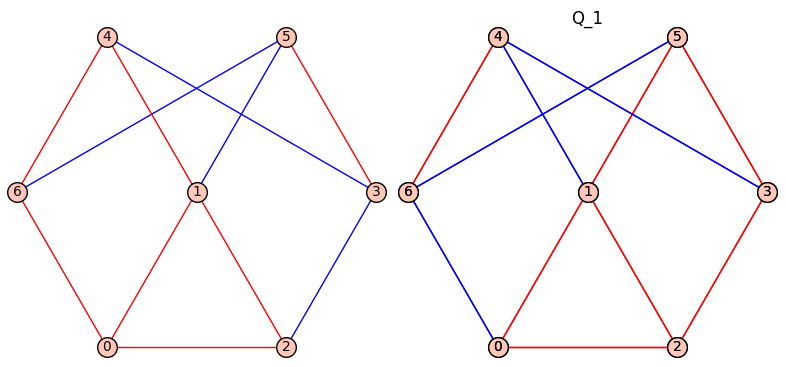

In [15]:
res, NACs = Q1.has_injective_spatial_embedding(certificate=True)
print res
graphics_array([col.plot() for col in NACs])

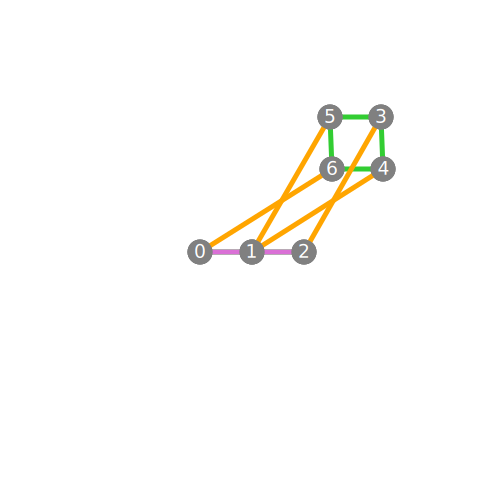

In [16]:
motion_Q1 = GraphMotion.SpatialEmbeddingConstruction(Q1,NACs)
motion_Q1.fix_edge([0,1])
motion_Q1.animation_SVG()

In [17]:
table([['', 'movable', 'reason']]+
      [[G.name()]+list(G.is_movable()) for G in examples])

,movable,reason
4-cycle,yes,bipartite
SmallestFlexibleLamanGraph,no,CDC is complete
3-prism,yes,grid construction
MaxEmbeddingsLamanGraph_7vert,no,CDC is complete
Complete bipartite graph,yes,bipartite
No NAC,no,no NAC-coloring
Q_1,yes,spatial embedding


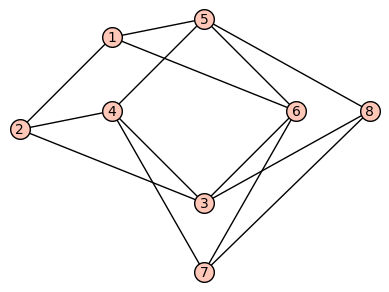

('cannot decide', '')

In [18]:
S1 = GraphGenerator.S1Graph()
show(S1)
S1.is_movable()

![S1](./animations/S_1.svg)

## Collision-free models

Can a movable graph be modelled by a planar linkage in 3D that is collision-free?

$\implies$ Place edges into different layers and avoid collision with the axis.

In [19]:
%%HTML
<video width="100%" controls> <source src="https://jan.legersky.cz/img/collidingK33.mp4" type="video/mp4"> </video>

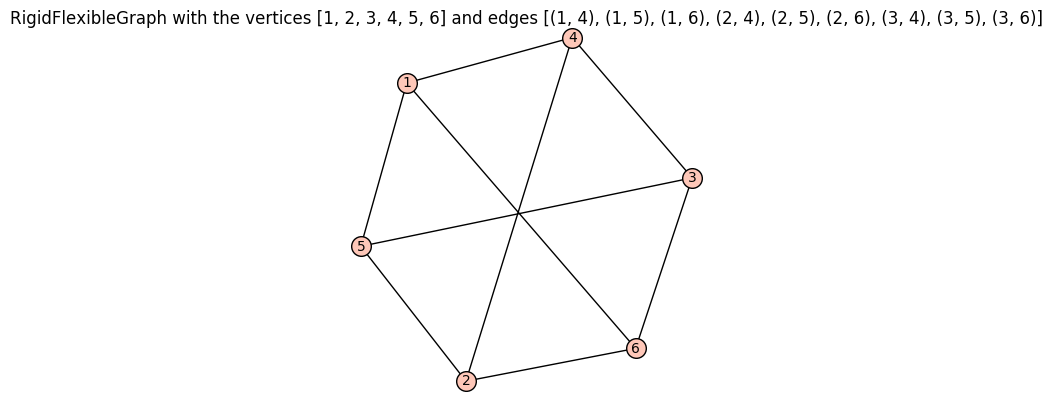

In [20]:
edges = [(1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 5), (3, 6), (3, 4)]
K33 = RigidFlexibleGraph(edges); K33

In [21]:
t = var('t')
P = {
    1: vector([sin(t),0]),
    2: vector([sqrt(1+sin(t)^2),0]),
    3: vector([-sqrt(2+sin(t)^2),0]),
    4: vector([0,cos(t)]),
    5: vector([0,sqrt(1+cos(t)*cos(t))]),
    6: vector([0,-sqrt(2+cos(t)^2)]),
}; P

{1: (sin(t), 0),
 2: (sqrt(sin(t)^2 + 1), 0),
 3: (-sqrt(sin(t)^2 + 2), 0),
 4: (0, cos(t)),
 5: (0, sqrt(cos(t)^2 + 1)),
 6: (0, -sqrt(cos(t)^2 + 2))}

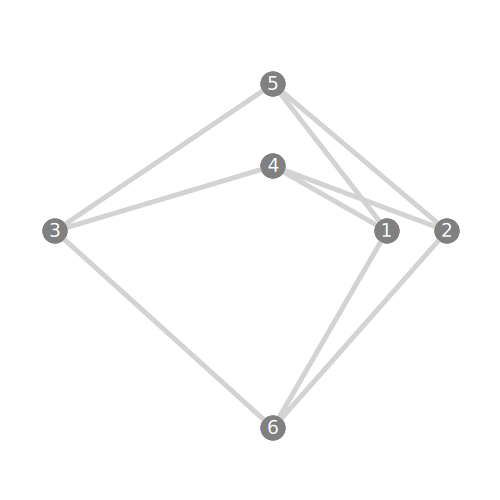

In [22]:
M = GraphMotion.ParametrizedMotion(K33, P, 'symbolic')
M.animation_SVG('animations/K33', edge_partition=[])

In [23]:
collisions = {
    1: [[4,2],[4,3]],
    4: [[1,6], [1,5]]
}
h_fun = M.height_function(collisions); h_fun
name = 'K33'
M.generate_POVray(name, h_fun, antialias=False, frames=100, width=320, height=240)

In [24]:
import subprocess
subprocess.call(['mkdir', 'img_'+name])
subprocess.call(['povray', name+'.ini']) # not installed in Binder 

1

In [25]:
subprocess.call(['ffmpeg', '-y', '-framerate', '24', '-i', 
                 'img_'+name+'/'+name+'%03d.png', '-vb', '2M', name+'.mp4'])  # not installed in Binder 

In [26]:
%%HTML
<video width="100%" controls> <source src="K33.mp4" type="video/mp4"> </video>

In [27]:
%%HTML
<video width="100%" controls> <source src="https://jan.legersky.cz/img/K33.mp4" type="video/mp4"> </video>

In [28]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.rendered_html { font-size: 25px; }</style>"))